# Saturation Calculation

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from skimage import data, io, color, img_as_ubyte

### Load Image Stack

In [2]:
# The first 120 slices of the original 1404x661x661 stack was removed, then scaled down to 160x330x330
image = img_as_ubyte(io.imread('19d_seg_grain_hydrate_brine_z160.tif'))
# image properties
print('Geometry of image (z,x,y) is', image.shape)
print('Image intensity range is from',image.min(),'to',image.max())
# n+1th slice of image[n]
image[51]

Geometry of image (z,x,y) is (160, 661, 661)
Image intensity range is from 0 to 255


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

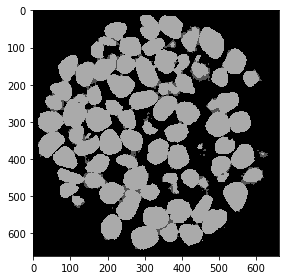

In [3]:
io.imshow(image[51])

### Create Subvolume

Geometry of image (z,x,y) is (500, 500)
Image intensity range is from 0 to 170


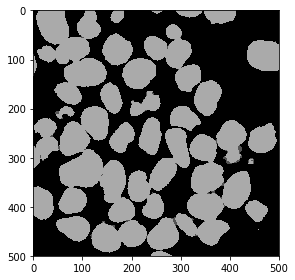

In [4]:
subvolume = image[0,100:600,100:600]
print('Geometry of image (z,x,y) is', subvolume.shape)
print('Image intensity range is from',subvolume.min(),'to',subvolume.max())
io.imshow(subvolume)

### Calculate Saturation for Volume

In [5]:
gas = (subvolume == 0).sum() # black
hydrate = ((subvolume > 0) & (subvolume < 170)).sum() # darkgray
grain = (subvolume == 170).sum() # lightgray
brine = (subvolume == 255).sum() # white
total = gas + hydrate + brine + grain
pore = total - grain

phi = pore/total
Sg = gas/pore
Sw = brine/pore 
Sh = hydrate/pore

print('Porosity =',np.round(phi,decimals=4))
print('Gas Saturation =',np.round(Sg,decimals=4))
print('Water Saturation =',np.round(Sw,decimals=4))
print('Hydrate Saturation =',np.round(Sh,decimals=4))

Porosity = 0.5222
Gas Saturation = 0.9908
Water Saturation = 0.0
Hydrate Saturation = 0.0092


### Calculate Saturation Profile

In [6]:
L = len(image) # number of slices 
phi_profile = np.zeros(L) # create dummy array
Sg_profile = np.zeros(L) # create dummy array
Sh_profile = np.zeros(L) # create dummy array
Sw_profile = np.zeros(L) # create dummy array

for Z in range(0,L): 
    sliceZ = image[Z,100:600,100:600]
    gas = (sliceZ == 0).sum() # black
    hydrate = ((sliceZ > 0) & (sliceZ < 170)).sum() # darkgray
    grain = (sliceZ == 170).sum() # lightgray
    brine = (sliceZ == 255).sum() # white
    total = gas + hydrate + brine + grain
    pore = total - grain
    phi_profile[Z] = pore/total
    Sg_profile[Z] = gas/pore
    Sh_profile[Z] = hydrate/pore
    Sw_profile[Z] = brine/pore 

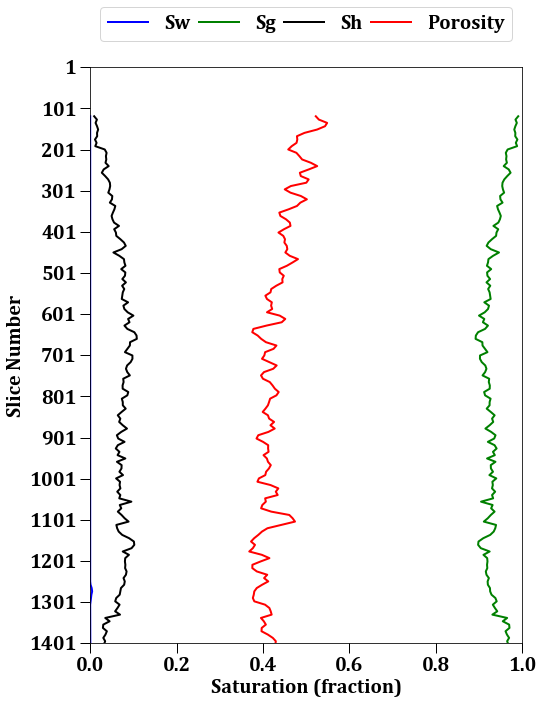

In [10]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Cambria'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1

depth = np.linspace(120,1404,L)

plt.subplot(111)
plt.plot(Sw_profile,depth,'b-', linewidth=2, markersize=6,label="Sw")
plt.plot(Sg_profile,depth,'g-', linewidth=2, markersize=6,label="Sg")
plt.plot(Sh_profile,depth,'k-', linewidth=2, markersize=6,label="Sh")
plt.plot(phi_profile,depth,'r-', linewidth=2, markersize=6,label="Porosity")
plt.xlabel('Saturation (fraction)')
plt.ylabel('Slice Number')
plt_xmin=0
plt_xmax=1
plt.xlim([plt_xmin,plt_xmax])
plt.xticks(np.arange(plt_xmin,plt_xmax+0.01,0.2))
plt_ymin=1
plt_ymax=1400
plt.ylim([plt_ymax,plt_ymin])
plt.yticks(np.arange(plt_ymin,plt_ymax+10,100))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=4, mode="expand")
#plt.grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=2, wspace=0.6, hspace=0.3)
plt.savefig('19d_seg_grain_hydrate_brine_z160_saturationprofile.png',dpi=600,bbox_inches="tight")
plt.show() 

In [8]:
print('Average Porosity =',np.round(np.average(phi_profile),decimals=4))
print('Average Water Saturation =',np.round(np.average(Sw_profile),decimals=4))
print('Average Gas Saturation =',np.round(np.average(Sg_profile),decimals=4))
print('Average Hydrate Saturation =',np.round(np.average(Sh_profile),decimals=4))

Average Porosity = 0.43
Average Water Saturation = 0.0001
Average Gas Saturation = 0.9341
Average Hydrate Saturation = 0.0658


In [9]:
data = {'Porosity':phi_profile, 'Water Saturation':Sw_profile, 'Gas Saturation':Sg_profile, 'Hydrate Saturation':Sh_profile} 
df = pd.DataFrame(data) 
df.to_csv("19d_seg_grain_hydrate_brine_z160.csv")     
df.describe().to_csv("19d_seg_grain_hydrate_brine_z160_summary.csv")   
df.describe()

Porosity  Water Saturation  Gas Saturation  Hydrate Saturation
count  160.000000        160.000000      160.000000          160.000000
mean     0.430035          0.000094        0.934138            0.065768
std      0.038650          0.000522        0.022274            0.022264
min      0.368196          0.000000        0.892108            0.009184
25%      0.402916          0.000000        0.919426            0.054834
50%      0.418892          0.000000        0.928170            0.070546
75%      0.452076          0.000000        0.945166            0.080574
max      0.548496          0.004486        0.990816            0.107892